In [162]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [163]:
df = pd.read_csv('Iris.csv')

In [164]:
# Limpiar Datos
# Mapeo de datos
unique_species = df['Species'].unique()
# Crear un diccionario de mapeo para los valores únicos de "species" a enteros
species_mapping = {species: idx for idx, species in enumerate(unique_species)}
# Mapear los valores de la columna "species" a enteros utilizando el diccionario de mapeo
df['Species'] = df['Species'].map(species_mapping)
# Imputar los valores faltantes con la media de cada columna (solo para columnas numéricas)
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [165]:
centers = range(1, 9)
clusters = [KMeans(n_clusters=center) for center in centers]
scores = [model.fit(df).score(df) for model in clusters]

C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

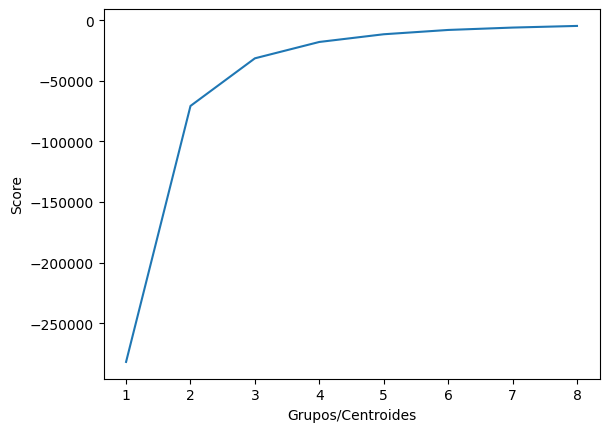

In [166]:
# Aplicamos la curva de Elbow
plt.plot(centers, scores)
plt.xlabel("Grupos/Centroides")
plt.ylabel("Score")
plt.show()

In [167]:
# Aplicamos el algoritmo de K-Means
k_means = KMeans(n_clusters=6)
k_means.fit(df)

C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [168]:
# Visualizamos los centroides
k_means.cluster_centers_

array([[1.35000000e+01, 5.02692308e+00, 3.46153846e+00, 1.46538462e+00,
        2.46153846e-01, 0.00000000e+00],
       [1.12500000e+02, 6.57083333e+00, 2.91250000e+00, 5.63750000e+00,
        2.04166667e+00, 2.00000000e+00],
       [6.40000000e+01, 5.99600000e+00, 2.76800000e+00, 4.30000000e+00,
        1.34400000e+00, 1.00000000e+00],
       [1.37500000e+02, 6.60384615e+00, 3.03076923e+00, 5.47307692e+00,
        2.01153846e+00, 2.00000000e+00],
       [3.90000000e+01, 5.06400000e+00, 3.36400000e+00, 1.59200000e+00,
        2.88000000e-01, 4.00000000e-02],
       [8.85000000e+01, 5.82916667e+00, 2.75416667e+00, 4.20000000e+00,
        1.30416667e+00, 1.00000000e+00]])

In [169]:
# Visualizamos los grupos
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

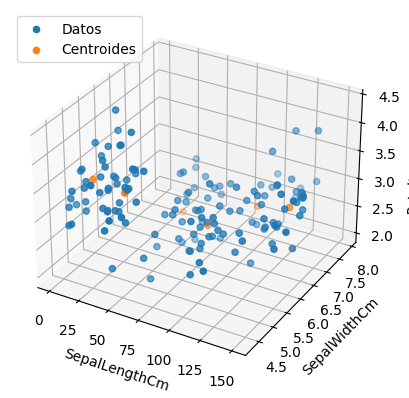

In [170]:
# Visualizaremos los datos de manera tridimensional
df_array = df.to_numpy()
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
chart = axis.scatter(df_array[:, 0], df_array[:, 1], df_array[:, 2])
centroids = axis.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2])
axis.set_xlabel('SepalLengthCm')
axis.set_ylabel('SepalWidthCm')
axis.set_zlabel('PetalLengthCm')
plt.legend((chart, centroids), ('Datos', 'Centroides'), loc='upper left')
plt.show()

In [171]:
iris_spicies_group = ['Iris-setosa',
                      'Iris-versicolor',
                      'Iris-virginica']

In [185]:
id = 70
sepalLengthCm = 5.6
sepalWidthCm = 2.5
petalLengthCm = 3.9
petalWidthCm = 1.1
speciesName = 0
datos = [[id, sepalLengthCm, sepalWidthCm, petalLengthCm, petalWidthCm, speciesName]]
print(f'El grupo al que pertenece el nuevo dato es: {iris_spicies_group[k_means.predict(datos)[0]]}')

El grupo al que pertenece el nuevo dato es: Iris-virginica


C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [142]:
df['Species'] = k_means.labels_

In [143]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2
